In [6]:
import pandas as pd

# Load dataset without parsing dates
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv")

# Print column names
print("Column names in CSV:", df.columns)


Column names in CSV: Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')


In [2]:
import pandas as pd

file_path = 'C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv'

# Load dataset without parsing dates
df = pd.read_csv(file_path)

# Print column names to check for timestamp column
print(df.columns)


Index(['REGION', 'SETTLEMENTDATE', 'TOTALDEMAND', 'RRP', 'PERIODTYPE'], dtype='object')


In [7]:
import pandas as pd

# Load the dataset with correct timestamp column
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv", parse_dates=["SETTLEMENTDATE"])

# Set timestamp as index
df.set_index("SETTLEMENTDATE", inplace=True)

# Print first few rows to confirm it worked
print(df.head())


                    REGION  TOTALDEMAND    RRP PERIODTYPE
SETTLEMENTDATE                                           
2018-01-01 00:30:00   NSW1      6912.25  91.86      TRADE
2018-01-01 01:00:00   NSW1      6745.63  88.83      TRADE
2018-01-01 01:30:00   NSW1      6466.06  73.62      TRADE
2018-01-01 02:00:00   NSW1      6279.80  71.49      TRADE
2018-01-01 02:30:00   NSW1      6177.31  69.27      TRADE


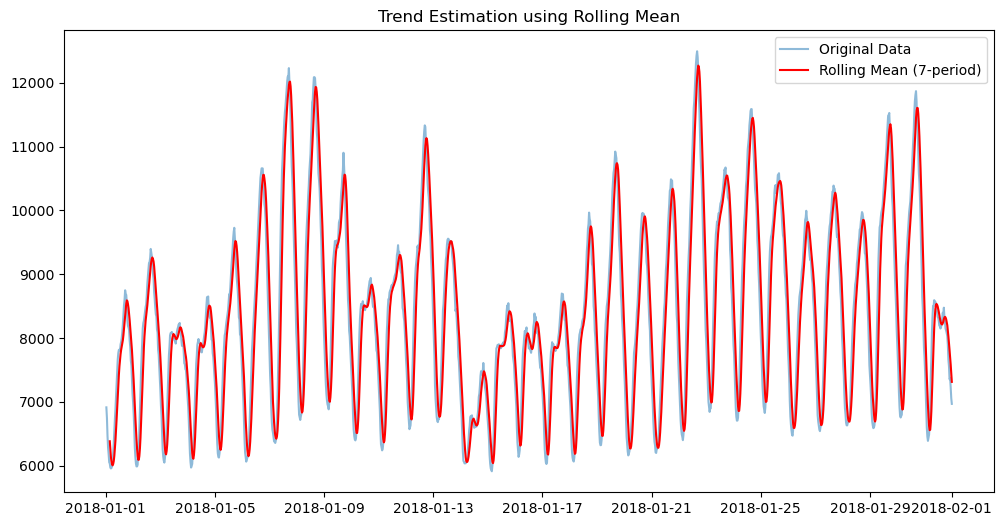

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv", parse_dates=["SETTLEMENTDATE"])
df.set_index("SETTLEMENTDATE", inplace=True)

# Aggregate using a rolling window (e.g., 7-period moving average)
df["Rolling_Mean"] = df["TOTALDEMAND"].rolling(window=7).mean()

# Plot original vs. aggregated trend
plt.figure(figsize=(12, 6))
plt.plot(df["TOTALDEMAND"], label="Original Data", alpha=0.5)
plt.plot(df["Rolling_Mean"], label="Rolling Mean (7-period)", color="red")
plt.legend()
plt.title("Trend Estimation using Rolling Mean")
plt.show()


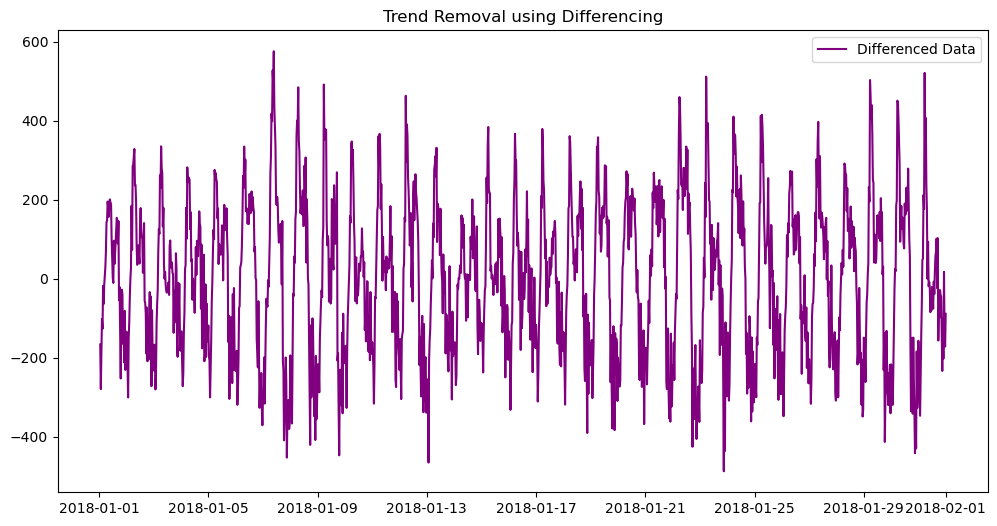

In [9]:
# First-order differencing to remove trend
df["Differenced"] = df["TOTALDEMAND"].diff()

# Plot the differenced series
plt.figure(figsize=(12, 6))
plt.plot(df["Differenced"], label="Differenced Data", color="purple")
plt.legend()
plt.title("Trend Removal using Differencing")
plt.show()


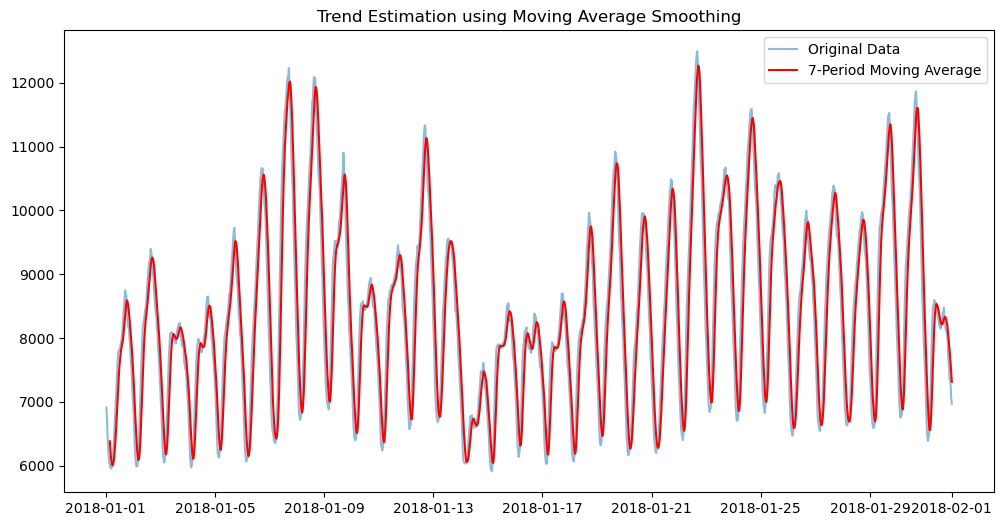

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv", parse_dates=["SETTLEMENTDATE"])
df.set_index("SETTLEMENTDATE", inplace=True)

# Moving Average Smoothing (Window = 7)
df["Moving_Avg"] = df["TOTALDEMAND"].rolling(window=7).mean()

# Plot original vs. smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(df["TOTALDEMAND"], label="Original Data", alpha=0.5)
plt.plot(df["Moving_Avg"], label="7-Period Moving Average", color="red")
plt.legend()
plt.title("Trend Estimation using Moving Average Smoothing")
plt.show()


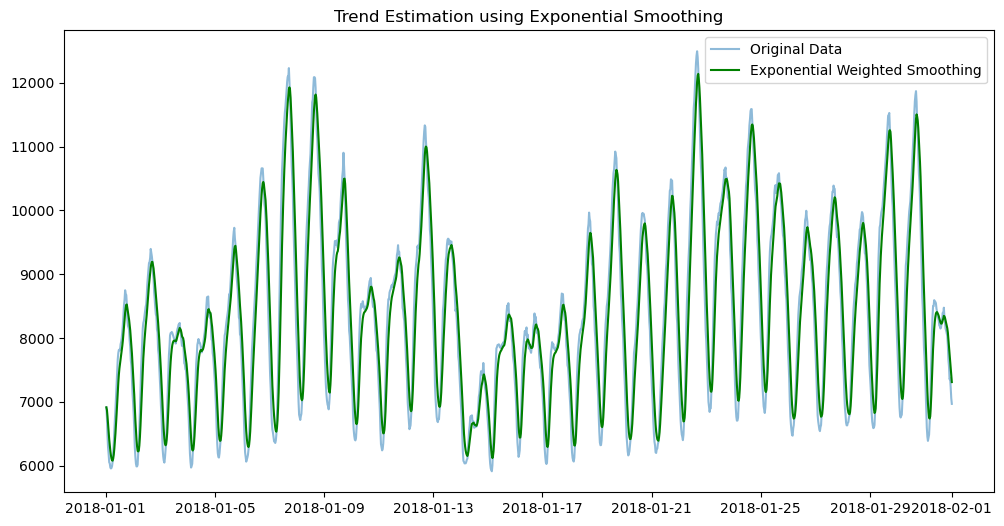

In [11]:
# Apply Exponential Weighted Moving Average (EWMA)
df["EWMA"] = df["TOTALDEMAND"].ewm(span=7, adjust=False).mean()

# Plot original vs. smoothed trend
plt.figure(figsize=(12, 6))
plt.plot(df["TOTALDEMAND"], label="Original Data", alpha=0.5)
plt.plot(df["EWMA"], label="Exponential Weighted Smoothing", color="green")
plt.legend()
plt.title("Trend Estimation using Exponential Smoothing")
plt.show()


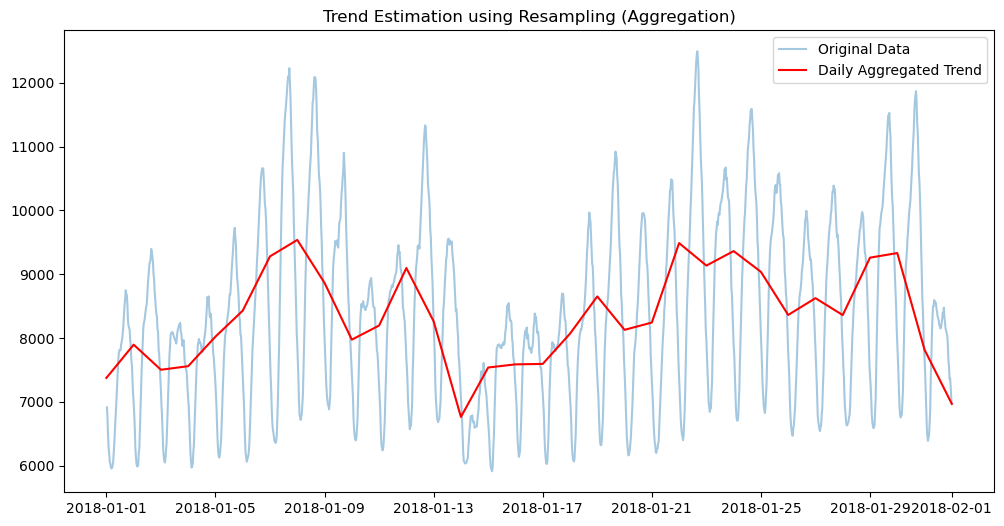

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("C:/Users/admin/Downloads/PRICE_AND_DEMAND_201801_NSW1.csv", parse_dates=["SETTLEMENTDATE"])
df.set_index("SETTLEMENTDATE", inplace=True)

# Aggregate to daily total demand
df_daily = df["TOTALDEMAND"].resample("D").mean()

# Plot original vs aggregated data
plt.figure(figsize=(12, 6))
plt.plot(df["TOTALDEMAND"], label="Original Data", alpha=0.4)
plt.plot(df_daily, label="Daily Aggregated Trend", color="red")
plt.legend()
plt.title("Trend Estimation using Resampling (Aggregation)")
plt.show()
